In [76]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# loading dataset

df=pd.read_csv("cyberbullying_tweets.csv")
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [78]:
df.shape

(47692, 2)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [80]:
df["cyberbullying_type"].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [81]:
df["cyberbullying_type"].value_counts(ascending=False)

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cyberbullying Type')

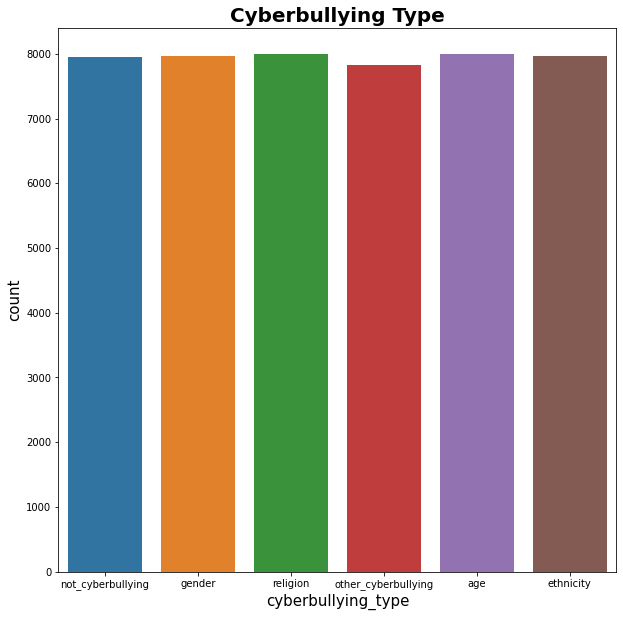

In [82]:
plt.figure(figsize=(10,10))
plt.xlabel("Type",fontsize=15)
plt.ylabel("Count",fontsize=15)
sns.countplot(df["cyberbullying_type"],data=df).set_title('Cyberbullying Type',fontsize=20, fontdict={"weight": "bold"})


In [39]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [40]:
df["cyberbullying_type"]=df["cyberbullying_type"].astype("category")
df["cyberbullying_type"].dtypes

CategoricalDtype(categories=['age', 'ethnicity', 'gender', 'not_cyberbullying',
                  'other_cyberbullying', 'religion'],
, ordered=False)

In [41]:
df["cyberbullying_type"]=df["cyberbullying_type"].cat.codes

In [42]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",1
47688,Turner did not withhold his disappointment. Tu...,1
47689,I swear to God. This dumb nigger bitch. I have...,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,1


In [43]:
#Data preprocessing

import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['tweet_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [44]:
# Creating Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [45]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
y=df['cyberbullying_type']

In [47]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [48]:
# Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred=spam_detect_model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score=accuracy_score(y_test,y_pred) #Accuracy = TP+TN/TP+FP+FN+TN
score=score*100

print('Accuracy of the model is {0:.2f}%'.format(score))

Accuracy of the model is 78.28%


Text(68.09375, 0.5, 'Actual Label')

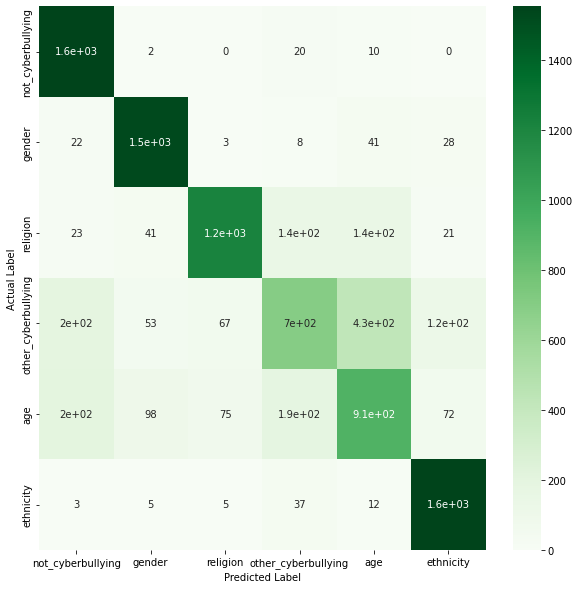

In [50]:
plt.figure(figsize=(10,10))

x_axis_labels = ['not_cyberbullying','gender','religion','other_cyberbullying','age','ethnicity']
y_axis_labels = ['not_cyberbullying','gender','religion','other_cyberbullying','age','ethnicity']

confusion_m=confusion_matrix(y_test,y_pred)

sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [58]:
# passive aggresive
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)

pac.fit(X_train, y_train)
y_pred_passive = pac.predict(X_test)


In [61]:

accuracy = accuracy_score(y_test, y_pred_passive)
accuracy=accuracy*100

print('Accuracy of the model is {0:.2f}%'.format(accuracy))

Accuracy of the model is 78.92%


In [63]:
#svm
from sklearn.svm import LinearSVC as svc

svm_model = svc().fit(X_train, y_train)
y_pred_svc=svm_model.predict(X_test)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [65]:

acc= accuracy_score(y_test, y_pred_svc)
acc=acc*100

print('Accuracy of the model is {0:.2f}%'.format(acc))

Accuracy of the model is 82.84%
